# iq-mnist-use-case

This is a study of training performance degradation in the classification of handwritten numbers (MNIST dataset) when noise is added in the input images.

In [1]:
import os

import matplotlib.pyplot as plt

from iquaflow.datasets import DSWrapper
from iquaflow.experiments import ExperimentInfo, ExperimentVisual, ExperimentSetup
from iquaflow.experiments.task_execution import PythonScriptTaskExecution

In [2]:
from custom_iqf import CustomNoiseModifier

In [2]:
#Define name of IQF experiment
experiment_name = "iq-mnist-use-case"

#Define path of the original(reference) dataset
data_path_train = "data/mnist_png/training"
data_path_valid = "data/mnist_png/validation"

#DS wrapper is the class that encapsulate a dataset
ds_wrapper_train = DSWrapper(data_path=data_path_train)
ds_wrapper_valid = DSWrapper(data_path=data_path_valid)

#Define path of the training script
python_ml_script_path = 'custom_train.py'

In [4]:
#List of modifications that will be applied to the original dataset:

ds_modifiers_list = [
    CustomNoiseModifier(params = {"sigma": 1*f})
    for f in [0,0.5,1,2,4,8]
]

In [5]:
# Task execution executes the training loop
# In this case the training loop is an empty script,
# this is because we evaluate the performance directly on the result of the modifiers.
task = PythonScriptTaskExecution( model_script_path = python_ml_script_path )

In [6]:
#Experiment definition, pass as arguments all the components defined beforehand
experiment = ExperimentSetup(
    experiment_name   = experiment_name,
    task_instance     = task,
    ref_dsw_train     = ds_wrapper_train,
    ref_dsw_val       = ds_wrapper_valid,
    ds_modifiers_list = ds_modifiers_list,
    repetitions       = 1
)

### Execution

The number of runs are all the combinations between repetitions, modifiers list as well as extra_train_params variations.

(you can skip this step in demo pre-executed datasets)

In [ ]:
experiment.execute()

# Visualize

In [3]:
# ExperimentInfo is used to retrieve all the information of the whole experiment. 
# It contains built in operations but also it can be used to retrieve raw data for futher analysis

experiment_info = ExperimentInfo(experiment_name)

In [5]:
df = experiment_info.get_df(
    ds_params=["modifier"],
    metrics=["valiloss",'trainloss'],
    dropna = True,
    fields_to_float_lst = ["valiloss",'trainloss']
)

In [6]:
ev = ExperimentVisual(df)

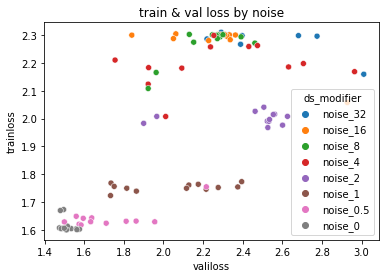

In [7]:
ev.visualize(
    plot_kind='scatter',
    xvar='valiloss',
    yvar='trainloss',
    legend_var='ds_modifier',
    title='train & val loss by noise'
)